# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum 

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 10)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


## 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request 

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [ ]:
raw[1]

'8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n'

In [ ]:
raw[1].split('\t')

['8132799',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '1\n']

In [ ]:
reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


## 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [ ]:
from konlpy.tag import Mecab 
tagger = Mecab() 

nouns = []
for review in reviews :
  for noun in tagger.nouns(review) :
    nouns.append(noun)

nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [ ]:
# 불용어 사전 생성
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(" ")
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [ ]:
# 불용어 사전에 포함되지 않는 단어들만
nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

## 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [ ]:
from collections import Counter 

nouns_counter = Counter(nouns) 
top_nouns = dict(nouns_counter.most_common(10)) # 가장 빈도수가 높은 단어 10개
top_nouns

{'감동': 6489,
 '내용': 5731,
 '드라마': 6896,
 '배우': 5893,
 '사람': 6742,
 '생각': 6943,
 '스토리': 7163,
 '연기': 9175,
 '최고': 8813,
 '평점': 8514}

## 단어 빈도 시각화

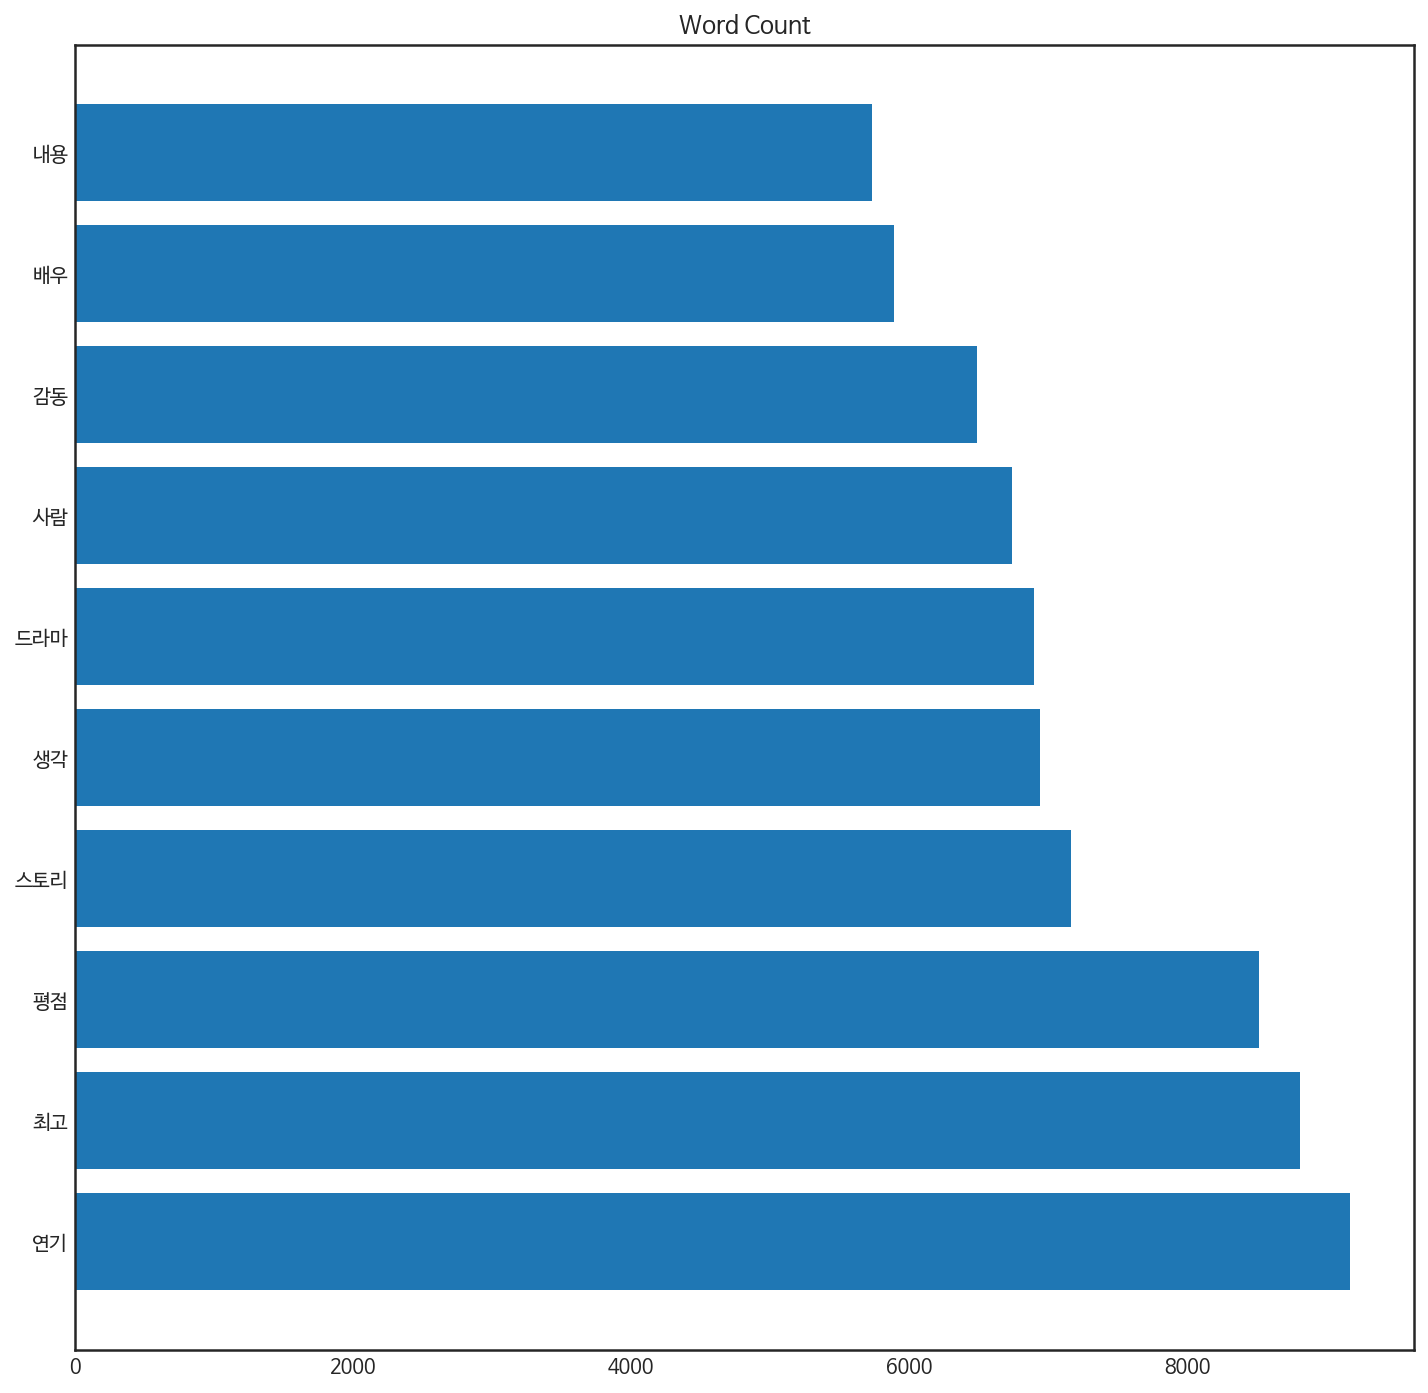

In [ ]:
import numpy as np 

y_pos = np.arange(len(top_nouns)) 

plt.figure(figsize = (12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [ ]:
!pip install wordcloud 

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud 

wc = WordCloud(background_color = 'white',
               font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns) # 워드클라우드 객체 생성

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

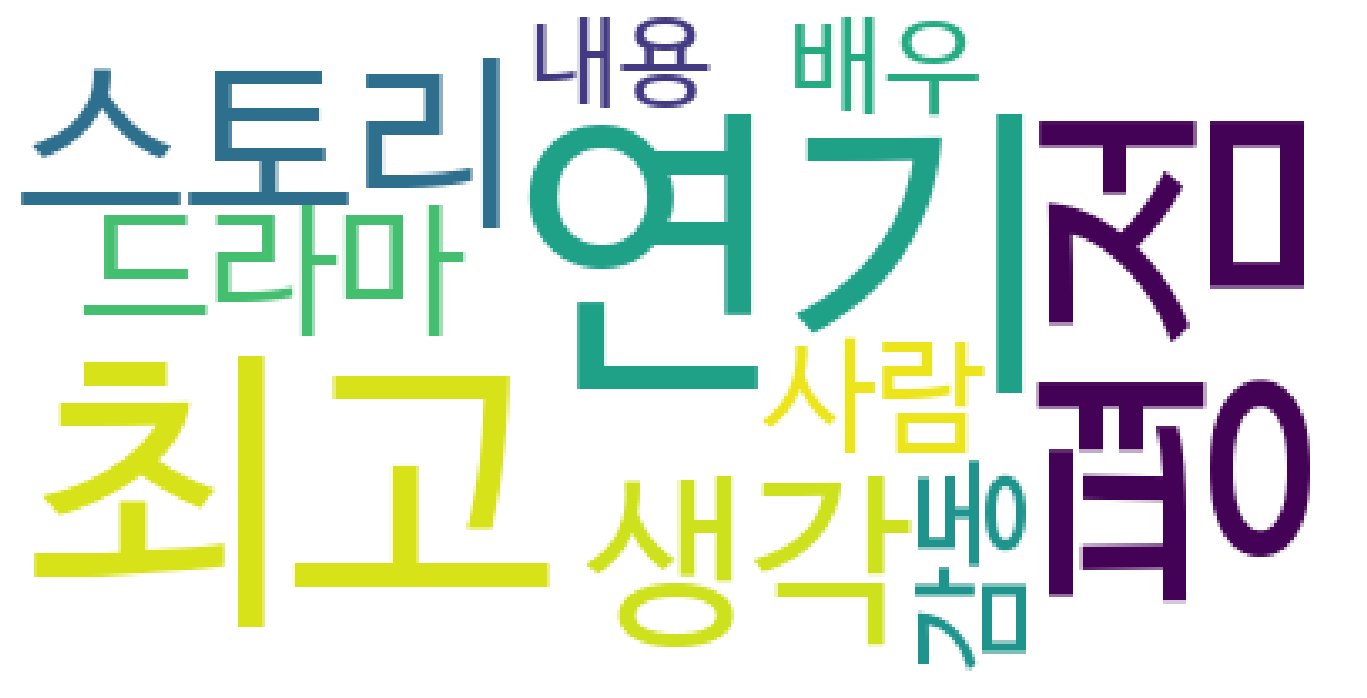

In [ ]:
figure = plt.figure(figsize = (12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [ ]:
!pip install squarify

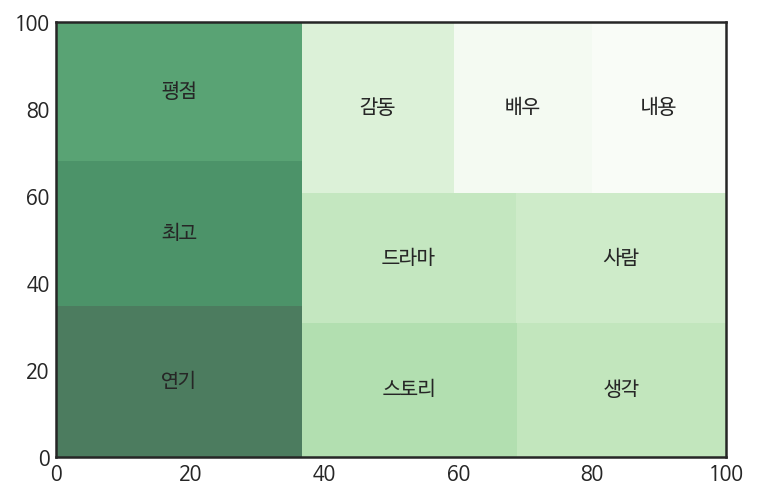

In [ ]:
import squarify 

norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                            vmax = max(top_nouns.values()))

colors = [mpl.cm.Greens(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
              sizes = top_nouns.values(),
              color = colors,
              alpha = .7);

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

### 자카드 유사도

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def jaccard_similarity(d1, d2) :
  lemmatizer = WordNetLemmatizer() 

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [ ]:
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


### 코사인 유사도

In [ ]:
tiv = TfidfVectorizer() 
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense() 

In [ ]:
print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

## 한국어 형태소 분석기 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum 

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 10)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 69 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import urllib.request 

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
raw[:5]

[b'id\tdocument\tlabel\n',
 b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n',
 b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x

In [ ]:
raw[1].decode()
raw[2].decode()

'8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n'

In [ ]:
reviews = []
for i in raw:
  i = i.decode()
  reviews.append(i.split('\t')[1])

print(reviews[:5])
reviews = reviews[1:]
print(reviews[:5])
print(len(reviews))

['document', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지']
['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']
200000


In [ ]:
from konlpy.tag import Mecab 

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews] 

print(reviews[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models import Word2Vec 
from sklearn.manifold import TSNE 
from matplotlib import font_manager as fm 
from matplotlib import rc 

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [ ]:
word2vec = Word2Vec(reviews, min_count = 5) # 최소 5번은 등장한 단어들만 word2vec에 사용

In [ ]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('드라마', 0.6791726350784302),
 ('작품', 0.6397839784622192),
 ('애니', 0.6122888326644897),
 ('애니메이션', 0.5861705541610718),
 ('수작', 0.5726643800735474),
 ('스릴러', 0.5596053004264832),
 ('다큐', 0.557127833366394),
 ('공포물', 0.5288388133049011),
 ('독립영화', 0.5220721960067749),
 ('다큐멘터리', 0.5186383724212646)]

### * t-sne을 이용한 차원축소, 단어 벡터 시각화

In [ ]:
tsne = TSNE(n_components = 2)
tsne

TSNE()

In [ ]:
vocab = word2vec.wv.vocab 
similarity = word2vec[vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
import pandas as pd  
transform_similarity = tsne.fit_transform(similarity) 
df = pd.DataFrame(transform_similarity, index = vocab, columns = ['X', 'Y'])
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,X,Y
어릴,-40.721729,-32.061207
때,-16.981901,-48.084904
보,-12.304025,-40.330883
고,27.719858,-49.336926
지금,-17.387280,-50.510098
다시,-20.874790,-44.318489
봐도,-35.923290,-12.089151
재밌,30.367231,14.330517
어요,29.405434,-47.570290
ㅋㅋ,-27.626429,-27.879026


In [ ]:
df.shape

(18982, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


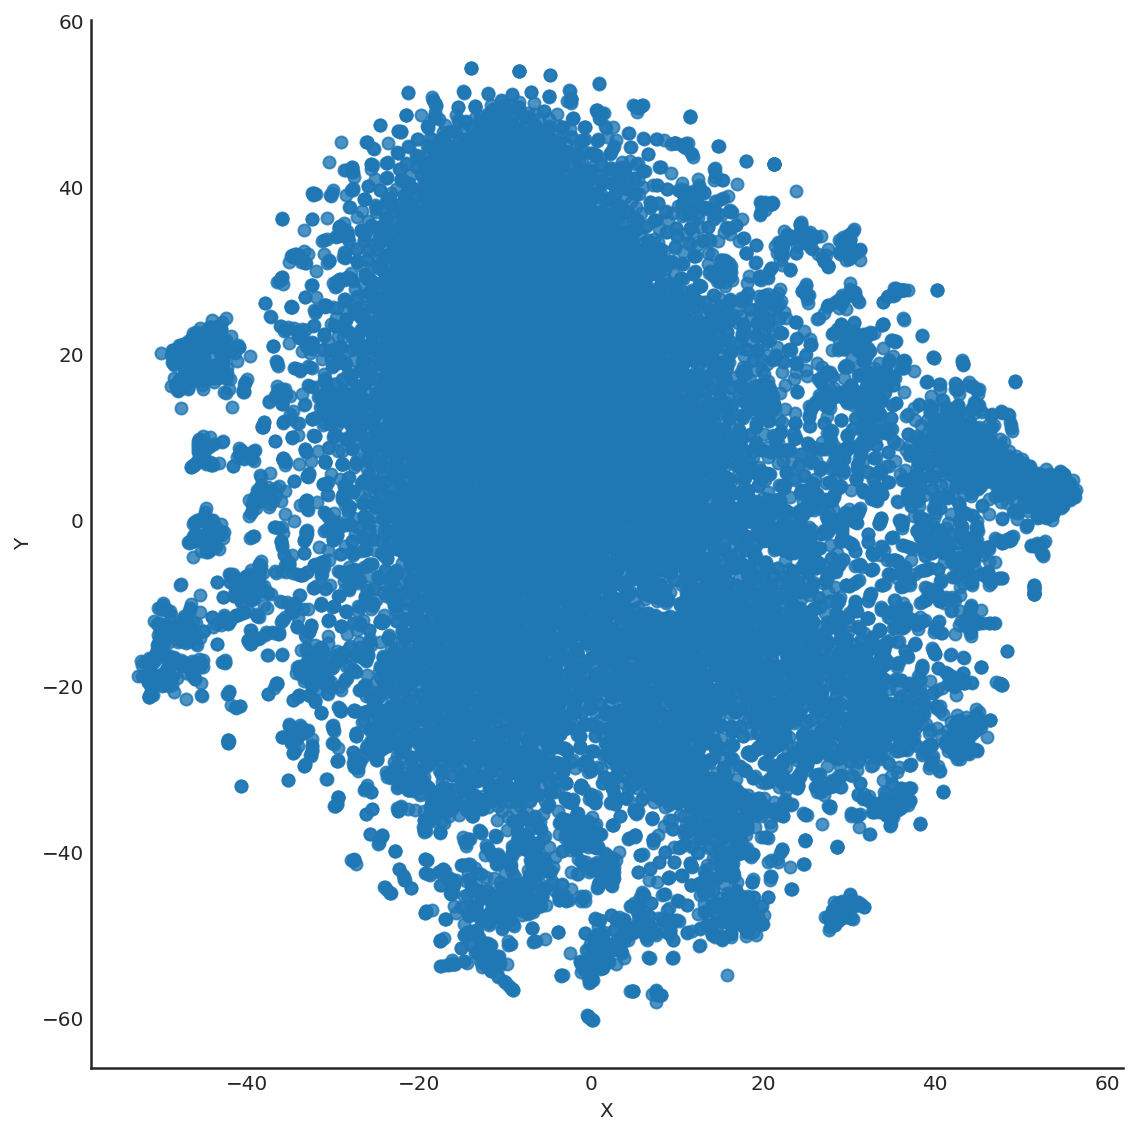

In [ ]:
import seaborn as sns 

sns.lmplot('X', 'Y', data = df, fit_reg = False, size = 8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn import cluster

ward = cluster.AgglomerativeClustering(n_clusters = 6, linkage = 'ward') # 와드 연결법
predict = ward.fit_predict(df)
predict[:10]

array([1, 0, 0, 2, 0, 0, 1, 4, 2, 0])

In [ ]:
results = df 
results['predict'] = predict 
results[0:10]

,X,Y,predict
어릴,-40.721729,-32.061207,1
때,-16.981901,-48.084904,0
보,-12.304025,-40.330883,0
고,27.719858,-49.336926,2
지금,-17.387280,-50.510098,0
다시,-20.874790,-44.318489,0
봐도,-35.923290,-12.089151,1
재밌,30.367231,14.330517,4
어요,29.405434,-47.570290,2
ㅋㅋ,-27.626429,-27.879026,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


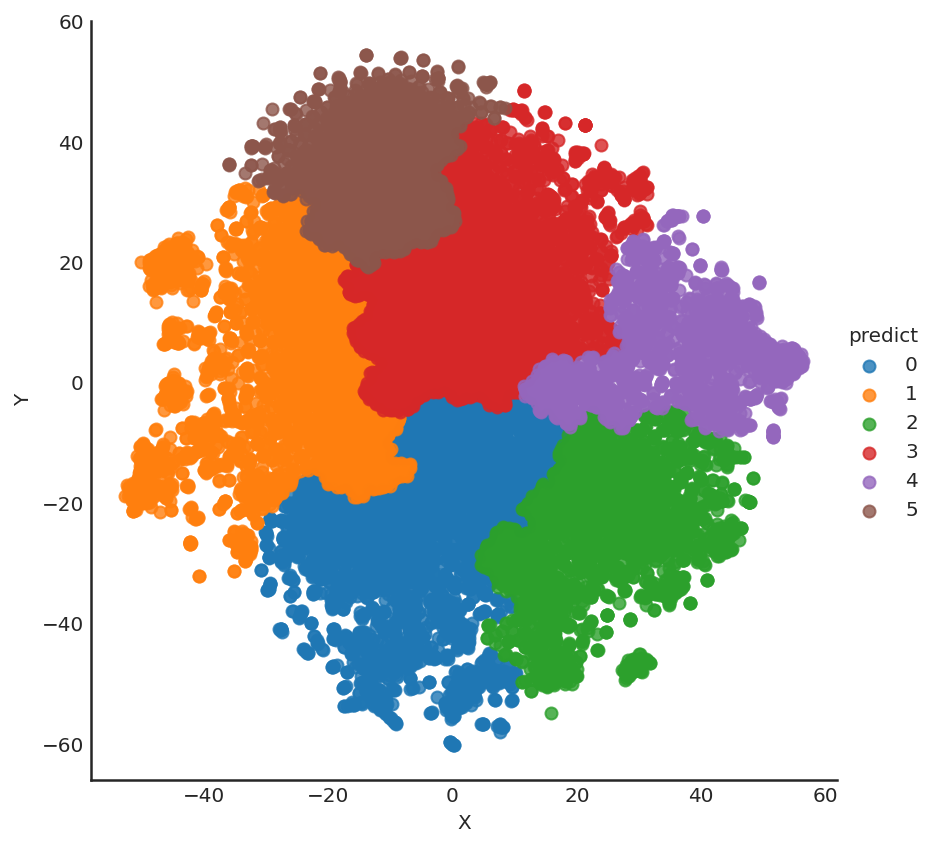

In [ ]:
sns.lmplot('X', 'Y', data = results, fit_reg = False, size = 6, hue = "predict")

#### average

In [ ]:
avg = cluster.AgglomerativeClustering(n_clusters = 6, linkage = 'average') # 와드 연결법
predict = avg.fit_predict(df)
predict

array([3, 0, 0, ..., 1, 5, 1])

In [ ]:
results = df 
results['predict'] = predict 
results[0:10]

,X,Y,predict
어릴,-40.721729,-32.061207,3
때,-16.981901,-48.084904,0
보,-12.304025,-40.330883,0
고,27.719858,-49.336926,0
지금,-17.387280,-50.510098,0
다시,-20.874790,-44.318489,0
봐도,-35.923290,-12.089151,3
재밌,30.367231,14.330517,2
어요,29.405434,-47.570290,0
ㅋㅋ,-27.626429,-27.879026,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


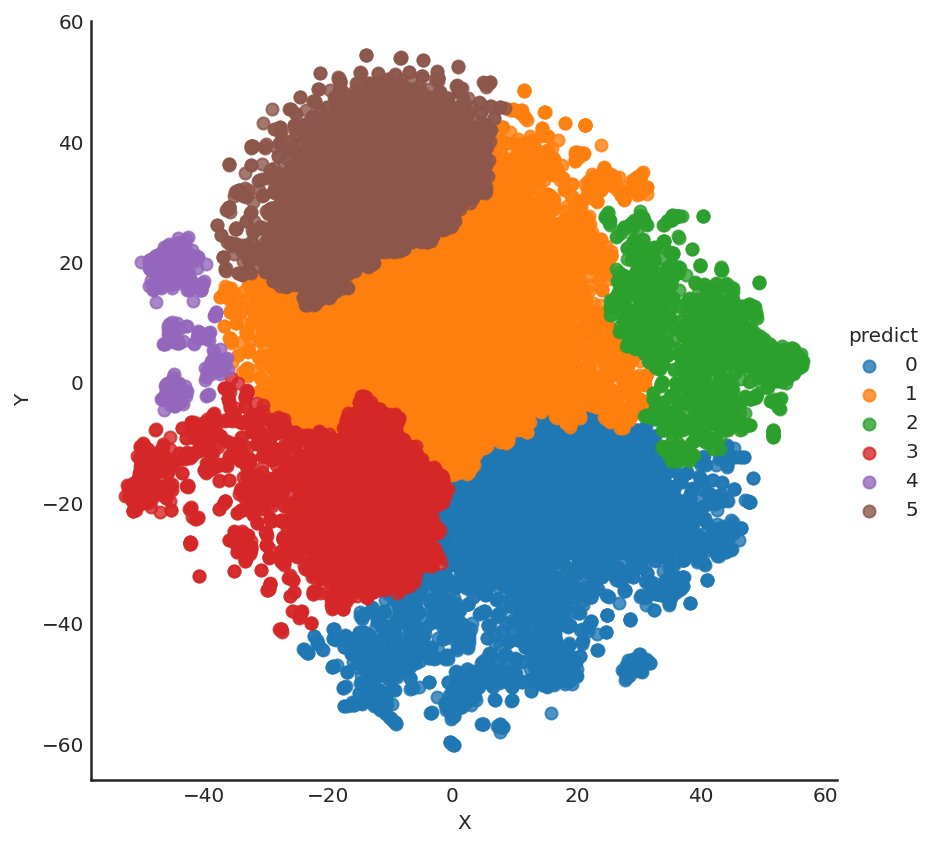

In [ ]:
sns.lmplot('X', 'Y', data = results, fit_reg = False, size = 6, hue = "predict")

#### complete

In [ ]:
complete = cluster.AgglomerativeClustering(n_clusters = 6, linkage = 'complete') # 와드 연결법
predict = complete.fit_predict(df)
predict

array([3, 2, 2, ..., 0, 5, 4])

In [ ]:
results = df 
results['predict'] = predict 
results[0:10]

,X,Y,predict
어릴,-40.721729,-32.061207,3
때,-16.981901,-48.084904,2
보,-12.304025,-40.330883,2
고,27.719858,-49.336926,2
지금,-17.387280,-50.510098,2
다시,-20.874790,-44.318489,2
봐도,-35.923290,-12.089151,3
재밌,30.367231,14.330517,1
어요,29.405434,-47.570290,2
ㅋㅋ,-27.626429,-27.879026,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


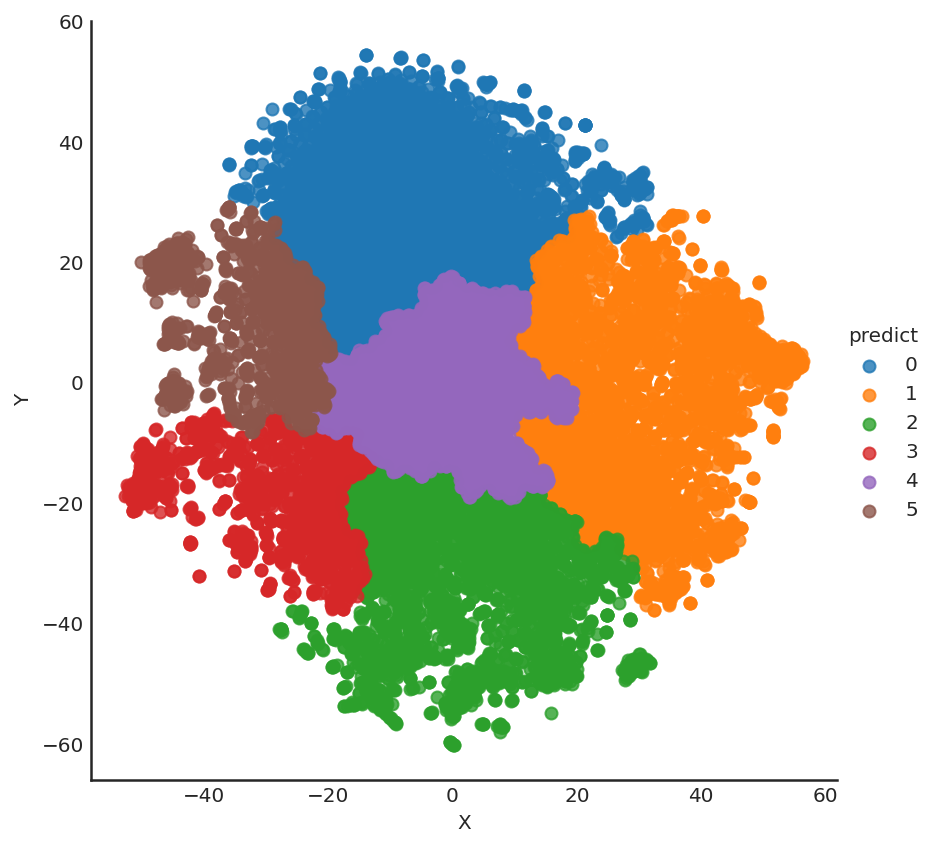

In [ ]:
sns.lmplot('X', 'Y', data = results, fit_reg = False, size = 6, hue = "predict")

### Scipy, 덴드로그램

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist, squareform 
from scipy.cluster.hierarchy import linkage, dendrogram 

distmatrix = pdist(df, metric = 'euclidean') # 유클리디안 거리 
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,18972,18973,18974,18975,18976,18977,18978,18979,18980,18981
0,0.000000,28.659000,29.613400,70.595335,29.763369,23.348275,20.540400,84.910732,71.828620,13.746910,...,75.720750,47.091576,48.963917,78.270629,72.343350,24.825511,74.694622,64.436769,51.203843,37.119133
1,28.659000,0.000000,9.055792,44.719289,2.458840,5.416684,40.687472,78.349378,46.390189,22.860084,...,87.359662,53.081622,62.047107,84.962069,83.264918,20.220649,87.251177,70.130485,66.583420,44.363741
2,29.613400,9.055792,0.000000,41.024627,11.377868,9.452990,36.830220,69.352035,42.333059,19.769289,...,79.653820,45.035357,55.071595,76.535546,75.479568,13.077284,79.716688,61.729390,60.013265,36.883315
3,70.595335,44.719289,41.024627,0.000000,45.122391,48.853092,73.748539,63.730305,2.441755,59.368787,...,98.533672,66.605552,80.948737,89.461785,94.209477,48.923705,99.754447,77.008237,87.095787,63.680170
4,29.763369,2.458840,11.377868,45.122391,0.000000,7.106247,42.670280,80.534456,46.884971,24.859717,...,89.791902,55.534955,64.420785,87.419615,85.702949,22.658540,89.670322,72.587856,68.909917,46.790614


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


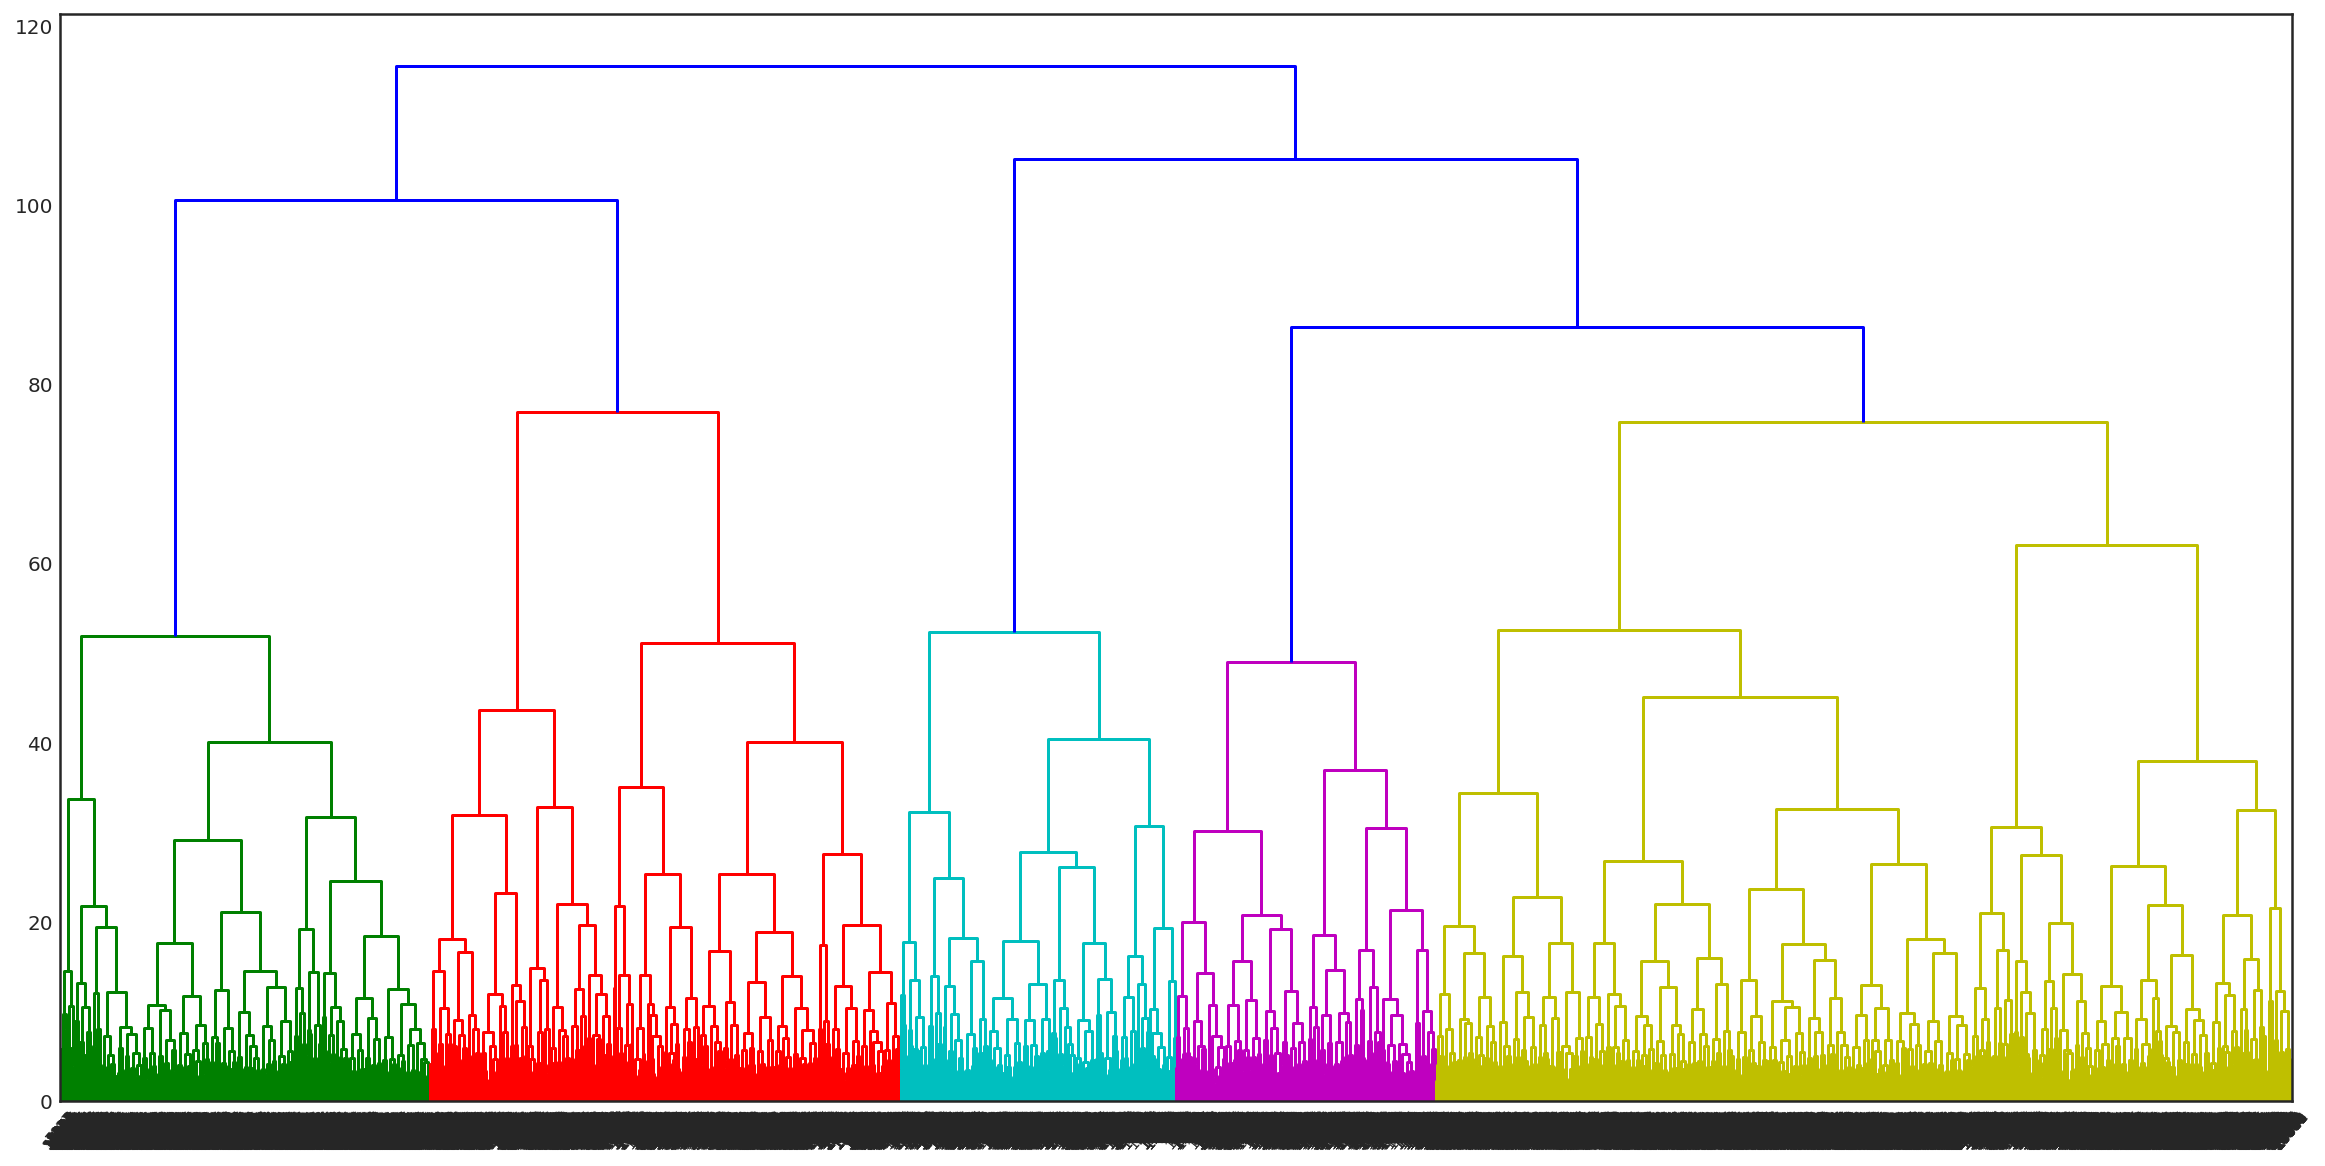

In [ ]:
row_clusters = linkage(distmatrix, method = 'complete') 

plt.figure(figsize = (20, 10)) 
dendrogram(row_clusters,
           leaf_rotation = 50,
           leaf_font_size = 7)

plt.show()

In [ ]:
mergins = linkage(df, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(mergins,
           leaf_rotation = 50,
           leaf_font_size = 7)

plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
kmeans3 = cluster.KMeans(n_clusters = 3)
kmeans3.fit(df)
predict = kmeans3.predict(df)
predict[:10]

array([2, 2, 2, 0, 2, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
results = df 
results['predict'] = predict 
results[0:10]

,X,Y,predict
어릴,-40.721729,-32.061207,2
때,-16.981901,-48.084904,2
보,-12.304025,-40.330883,2
고,27.719858,-49.336926,0
지금,-17.387280,-50.510098,2
다시,-20.874790,-44.318489,2
봐도,-35.923290,-12.089151,2
재밌,30.367231,14.330517,0
어요,29.405434,-47.570290,0
ㅋㅋ,-27.626429,-27.879026,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


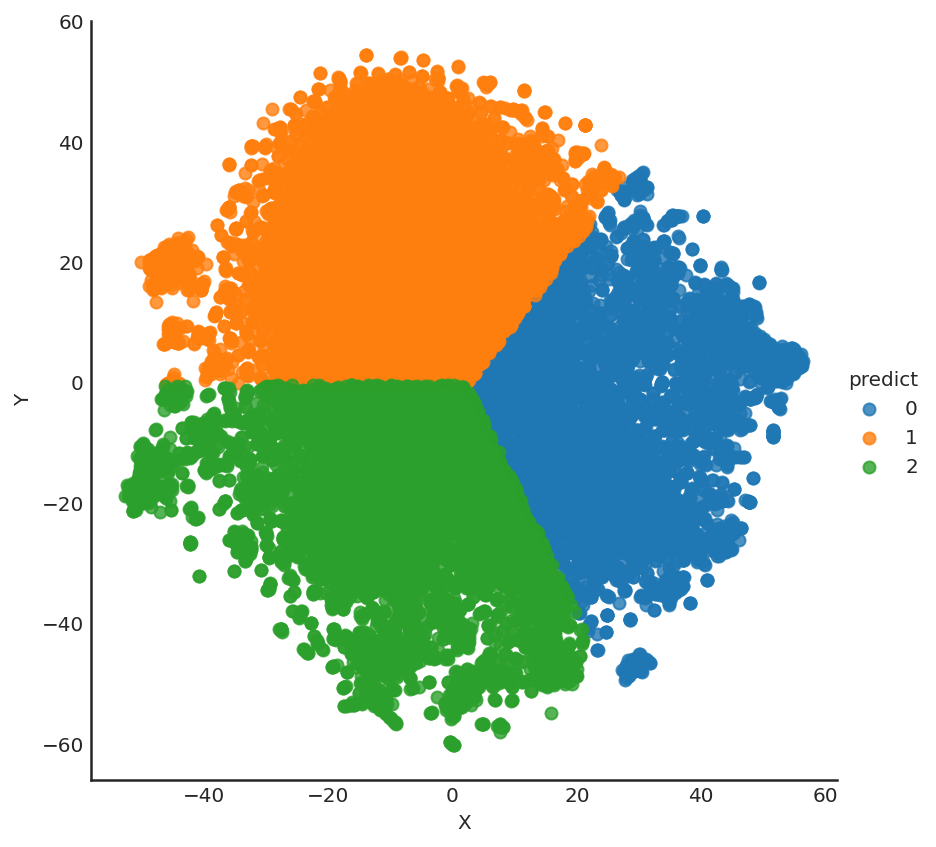

In [ ]:
sns.lmplot('X', 'Y', data = results, fit_reg = False, size = 6, hue = 'predict')

### 클러스터 개수 6

In [ ]:
kmeans6 = cluster.KMeans(n_clusters = 6)
kmeans6.fit(df)
predict = kmeans6.predict(df)
predict

In [ ]:
results = df 
results['predict'] = predict 
results[0:10]

In [ ]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 6, hue = 'predict')

# 문서 분류(Document Classification)

## 데이터 준비

* 문서 분류에 필요한 데이터는 `scikit-learn`이 제공하는 20개의 주제를 가지는 뉴스그룹 데이터를 사용
* 텍스트는 `CounterVectorizer`를 거쳐 DTM 행렬로 변환
* DTM 행렬은 문서에 등장하는 단어들을 빈도 수 별로 표현한 행렬


In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 

news = fetch_20newsgroups() 

x = news.data 
y = news.target 

cv = CountVectorizer() 
x = cv.fit_transform(x) 

'''
cv.vocabulary_ # 단어들의 인덱스
x.toarray() # 단어들의 각가의 빈도
'''

'\ncv.vocabulary_ # 단어들의 인덱스\nx.toarray() # 단어들의 각가의 빈도\n'

In [ ]:
len(cv.vocabulary_)

130107

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7919, 130107) (7919,) (3395, 130107) (3395,)


In [ ]:
print(x_train[0]) # 0번째 문서에 ***** 인덱스를 가진 단어가 n번 등장

## scikit-learn을 이용한 문서 분류

In [ ]:
from sklearn.metrics import accuracy_score

### Logistic Regression

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train) 
pred = LR.predict(x_test) 
acc = accuracy_score(pred, y_test)  
acc # 0.87422

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8742268041237113

## 서포트 벡터 머신 (Support Vector Machines) 

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
* 서포트 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

In [ ]:
from sklearn.svm import SVC

SVC = SVC(kernel = 'linear')
SVC.fit(x_train, y_train) 
pred = SVC.predict(x_test) 
acc = accuracy_score(pred, y_test)
print(acc)

0.8247422680412371


## Naive Bayes

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기

#### DTM을 이용한 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

MB = MultinomialNB()
MB.fit(x_train, y_train) 
pred = MB.predict(x_test) 
acc = accuracy_score(pred, y_test)
acc

0.8350515463917526

#### tf-idf를 이용한 정확도 향상

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
x_train_tf = tfidf.fit_transform(x_train) 
x_test_tf = tfidf.fit_transform(x_test) 

MB.fit(x_train_tf, y_train) 
prd = MB.predict(x_test_tf)
acc = accuracy_score(pred, y_test) 
acc

0.8350515463917526

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

DT = DecisionTreeClassifier() 
DT.fit(x_train, y_train) 
pred = DT.predict(x_test) 
acc = accuracy_score(pred, y_test) 
acc

0.6553755522827688

### XGBoost

In [ ]:
from xgboost import XGBClassifier

XGBC = XGBClassifier(n_estimators= 30, learning_rate=0.05, max_depth = 3)
XGBC.fit(x_train, y_train) 
pred = XGBC.predict(x_test) 
acc = accuracy_score(pred, y_test)
acc

0.7139911634756996

##교차 검증

* 일반 검증은 학습 데이터가 테스트 데이터로 사용되지 않음
* 교차 검증은 데이터를 n개의 집합으로 나누어 정확도를 계산해 학습 데이터로 사용된 데이터도 테스트 데이터로 사용
* 교차 검증을 사용하면 일반 검증보다 모델의 일반화가 잘 되어 있는지 평가 가능
* 앞서 구성한 나이브 베이즈 모델을 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate 

scores = cross_val_score(MB, x, y, cv = 5) 
print(scores, scores.mean())

[0.83870968 0.83826779 0.82368537 0.83031374 0.83642794] 0.833480903927519


* 교차 검증을 통해 일반 검증보다 좀 더 일반화된 모델 생성 가능
* 교차 검증은 일반 검증에 비해 n번 검증을 해 비용이 더 많이 소요

## 정밀도와 재현률 

* 정밀도(precision)는 양성 클래스(정답)으로 예측한 샘플이 양성 클래스일 확률을 의미
* 모델이 얼마나 양성 클래스를 잘 예측하는지를 나타냄
* 재현률(recall)은 양성 클래스인 샘플에서 모델이 양성 클래스로 예측한 샘플 비율을 의미하며, 모델이 얼마나 실제 상황을 재현하는지를 나타냄
* 정밀도와 재현율의 가중조화평균인 F1-score라는 지표는 정확도에 비해 더 효과적인 모델 분석 지표로 알려져 있음
* 직접 계산할 수도 있으나, scikit-learn은 이를 편리하게 계산해주는 함수를 제공

* 다중 클래스 분류 문제에서 정밀도와 재현률을 계산할 때는 클래스간의 지표를 어떻게 합칠지 지정 필요

  * None - 클래스간 지표를 합치지 말고 그대로 출력
  * micro - 정밀도와 재현률이 같음, 이로 인해 f1-score도 정밀도, 재현률과 동일
  * macro - 클래스간 지표를 단순 평균한 값
  * weighted - 클래스간 지표를 가중 평균한 값

In [ ]:
# micro - 클래스간 지표를 단순 평균한 값
# 정밀도, 재현율, F1-Score모두 동일하게 계산됨 
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(pred, y_test, average = 'micro')
recall = recall_score(pred, y_test, average = 'micro')
f1 = f1_score(pred, y_test, average = 'micro')

print(precision, recall, f1)

0.7139911634756996 0.7139911634756996 0.7139911634756996


In [ ]:
# macro - 클래스간 지표를 단순 평균한 값
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(pred, y_test, average = 'macro')
recall = recall_score(pred, y_test, average = 'macro')
f1 = f1_score(pred, y_test, average = 'macro')

print(precision, recall, f1)

0.709868854491946 0.748943591675921 0.7217395093266497


## 그리드 검색을 이용한 파라미터 최적화

* 그리드 검색을 사용하면 분류기에 사용하는 파라미터 최적화 가능
* 그리드 검색을 통해 앞서 구성한 나이브 베이즈 모델의 'alpha' 파라미터를 최적화시키는 예제

* `estimator`: 사용 모델 객체     
* `param_grid`: 사용 객체:지정 파라미터 리스트로 구성된 딕셔너리    
* `scoring`: 최적화하고자 하는 성능 지표   
* `cv`: 교차 검증 분할 개수      

In [ ]:
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
param_grid = dict(alpha = alpha) 

GS = GridSearchCV(estimator = MB, param_grid = param_grid, scoring = 'accuracy', cv = 10)
GS.fit(x, y)

print(GS.best_score_, GS.best_estimator_) # 제일 좋은 결과, 제일 좋은 모형

0.8897820965842167 MultinomialNB(alpha=0.001)
